In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

## Data Splitting

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('../data/processed/preprocessed_data.csv')
target = pd.read_csv('../data/processed/target.csv')
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()

In [4]:
def display_cm(cm):
    class_names = ["Class 0", "Class 1"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues") 
    plt.title("Confusion Matrix")
    plt.show()

In [5]:
k_folds = KFold(n_splits=10)

## Logistic Regression

Logistic Regression Accuracy: 0.6574624257252709
Confusion Matrix:
[[2224  980]
 [ 980 1538]]


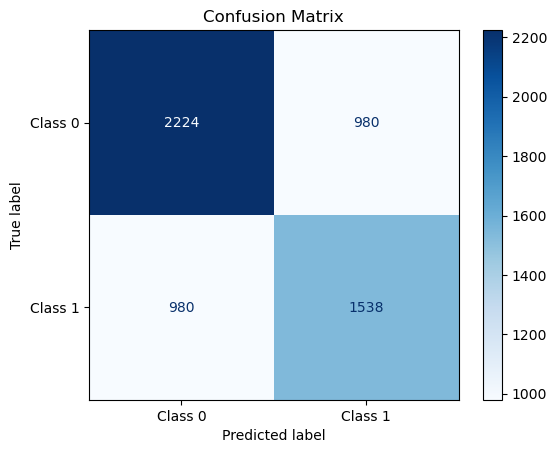

CV Scores: [0.65705548 0.66535605 0.65923984 0.66535605 0.6802097  0.65705548
 0.66011359 0.66666667 0.67089161 0.65646853]
Mean Accuracy: 0.6638413001371718


In [ ]:
logr = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='liblinear')
logr.fit(X_train, y_train)

# Evaluate model
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
display_cm(cm)
scores = cross_val_score(logr, X_train, y_train, cv=k_folds) 

print(f"CV Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

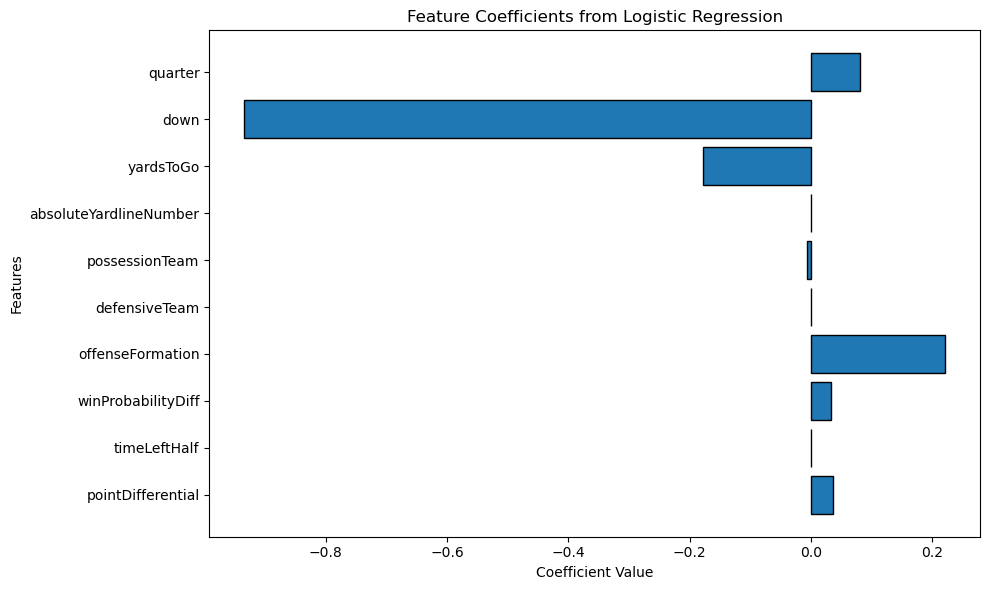

In [ ]:
coefficients = logr.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, edgecolor='k')
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

## Random Forrest

Accuracy: 0.9075498077595247


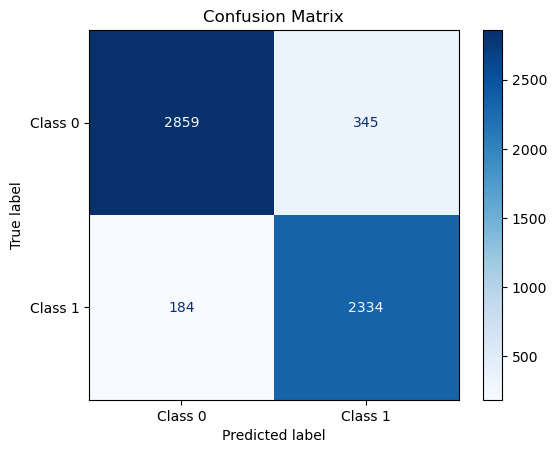

In [ ]:
rf = RandomForestClassifier(n_estimators=170, max_depth=25, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
display_cm(cm)


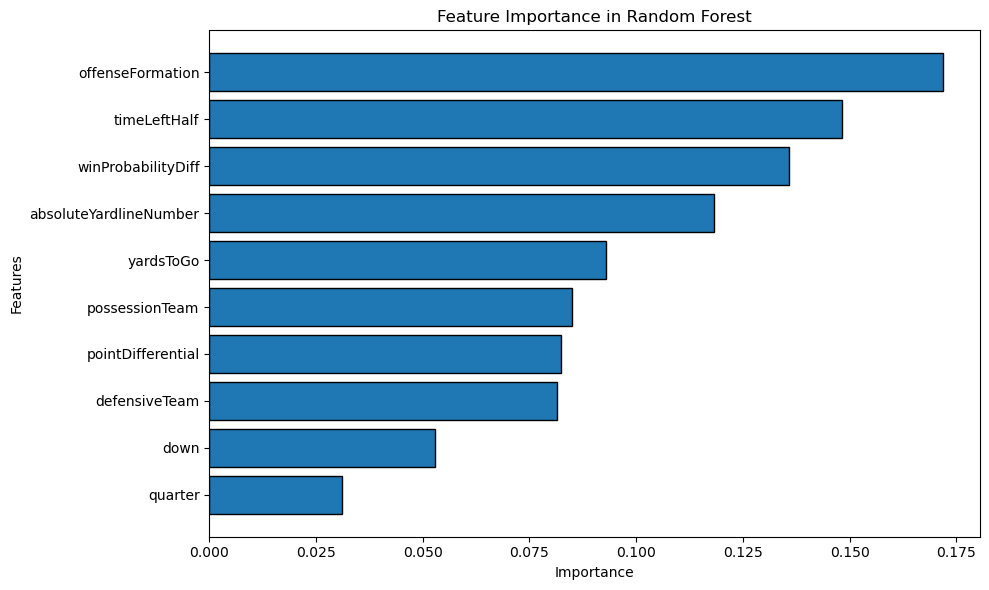

In [ ]:
feature_importance = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='k')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv=k_folds) 

print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

CV Scores: [0.90083006 0.88379205 0.88990826 0.88816077 0.89689821 0.88073394
 0.89296636 0.9017038  0.89641608 0.89597902]
Mean CV Score: 0.8927388551815157


## Decision Tree

Decision Tree Accuracy: 0.8864033554701154


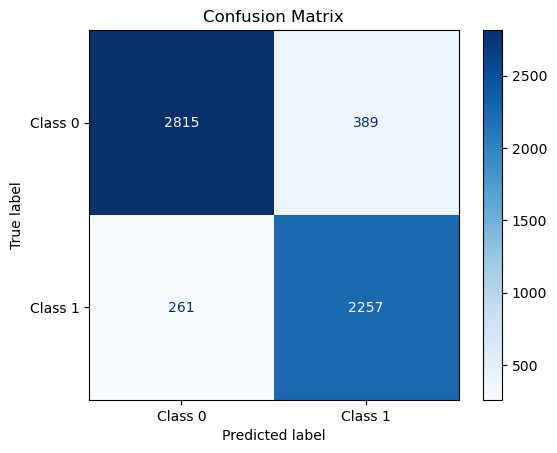

In [ ]:
dt = DecisionTreeClassifier(max_depth=29, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
display_cm(cm_dt)

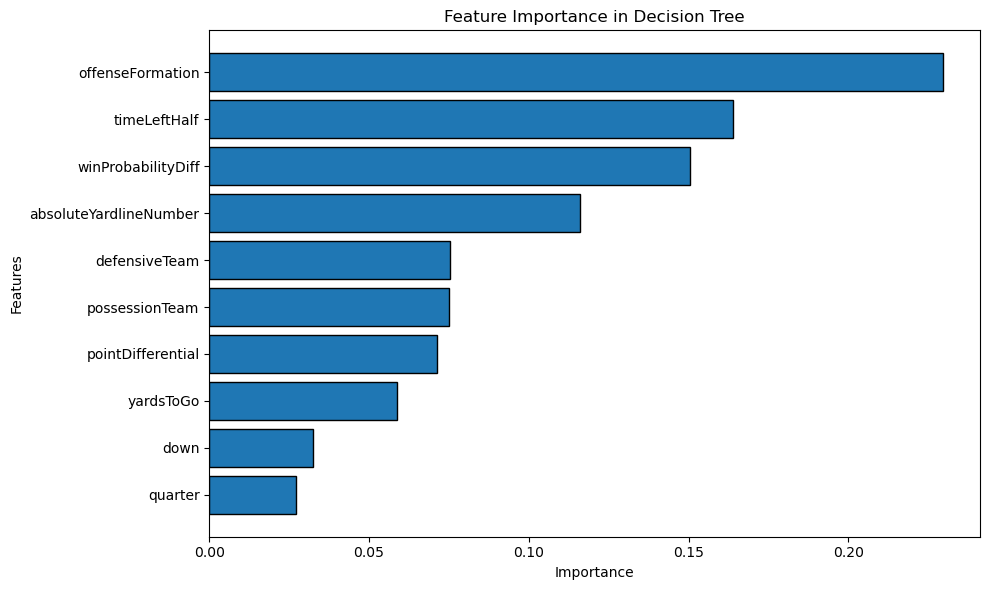

In [ ]:
feature_importance = dt.feature_importances_

features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='k')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [64]:
scores = cross_val_score(dt, X_train, y_train, cv=k_folds) 

print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

CV Scores: [0.87112276 0.86063783 0.87330712 0.87068589 0.87549148 0.85670599
 0.86675404 0.87155963 0.88155594 0.86276224]
Mean CV Score: 0.8690582926248064


## XGBClassifier

XGBoost Accuracy: 0.9010835372247465


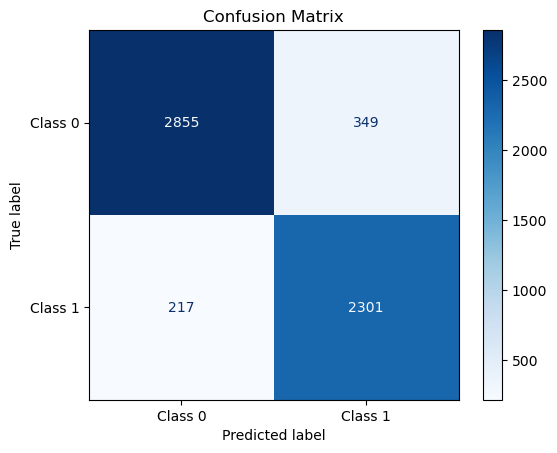

In [ ]:
xgb = XGBClassifier(n_estimators=130, max_depth=25, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
display_cm(cm_xgb)
scores = cross_val_score(xgb, X_train, y_train, cv=k_folds) 

print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

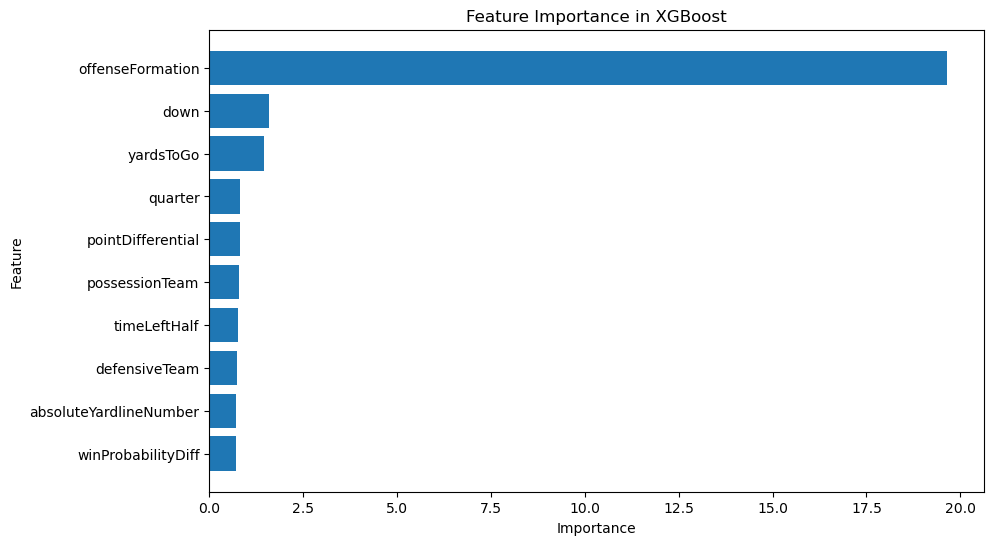

In [ ]:
importance = xgb.get_booster().get_score(importance_type='gain') 

importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis() 
plt.show()

## Neural Network

Neural Network Accuracy: 0.7088430618664803


/opt/anaconda3/envs/csc466/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


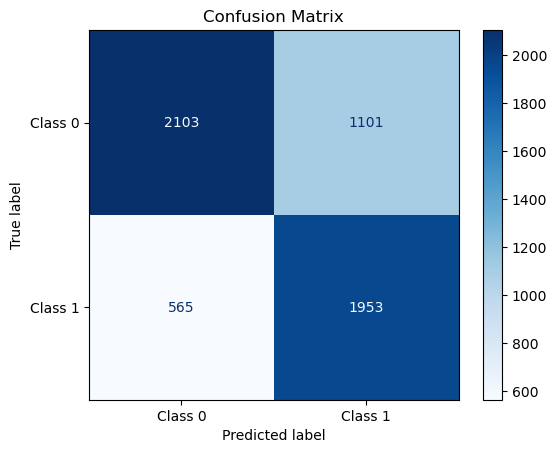

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(400,200,100), max_iter=100, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
display_cm(cm_mlp)
# scores = cross_val_score(mlp, X_train, y_train, cv=k_folds) 

# print(f"CV Scores: {scores}")
# print(f"Mean CV Score: {scores.mean()}")

/opt/anaconda3/envs/csc466/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/csc466/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/csc466/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/csc466/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/csc466/l

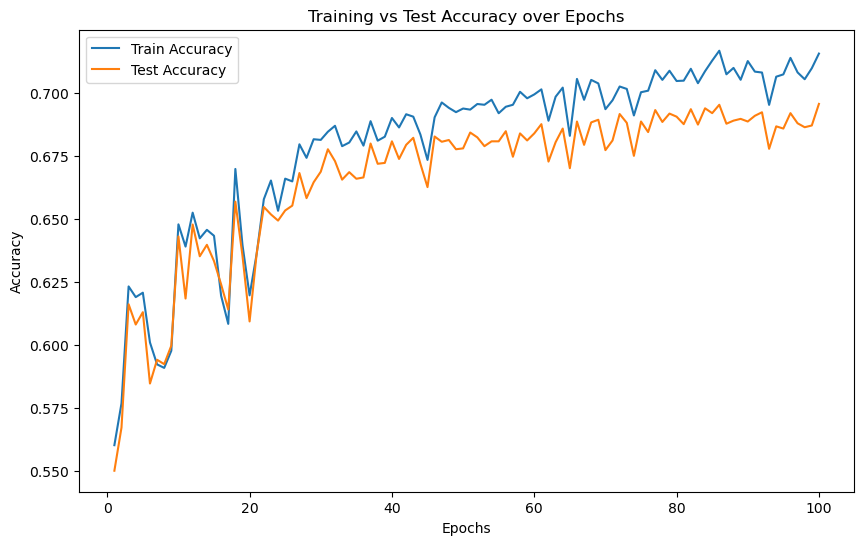

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
mlp = MLPClassifier(hidden_layer_sizes=(400, 200, 100), max_iter=1, warm_start=True, random_state=42)

# Prepare to record accuracy
train_accuracies = []
test_accuracies = []

# Custom training loop
n_epochs = 100
for epoch in range(n_epochs):
    mlp.fit(X_train, y_train)  # Perform one epoch of training
    # Record train accuracy
    train_acc = accuracy_score(y_train, mlp.predict(X_train))
    train_accuracies.append(train_acc)
    # Record test accuracy
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    test_accuracies.append(test_acc)

# Plotting train/test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, n_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy over Epochs")
plt.legend()
plt.show()
